# Implementing a simple spike simulator from scratch

$C_m \frac{dV}{dt} = -I_{leak}(t) - \sum_{k}{I_k(t)} + \frac{I_e(t)}{A}
\tag{1}$

$I_{leak}(t) = \frac{(V(t) - V_{rest})}{R_m} \tag{2}$

The membrane capacitance equation governs the dynamics of membrane potential. 

$C_m \frac{dV}{dt}$ = rate of change of membrane potential w.r.t. time

$\sum_{k}{I_k(t)}$ = all current imputs acting on a neuron at a given time t

$-I_{leak}(t)$ = the leak current drives the membrane potential back to its resting potential

$\frac{I_e(t)}{A}$ = external currents applied the the neuron (e.g. injection during experiments)

Rearrange equation

$\begin{align}dV &= (-I_{leak}(t) - \sum_{k}{I_k(t)} + \frac{I_e(t)}{A}) \cdot \frac{dt}{C_m}
\end{align} \tag{3}$

$I_{leak}(t) = \frac{(V(t) - V_{rest})}{R_m} = \bar g_{leak}(V(t) - \bar E_{leak}) \tag{4}$


For equations above:

Math symbol | Variable name | Defined | Comment
---    | ---        | --- | ---
$V(t)$  | `V_t`     | N | Membrane potential (mV)
$dV$  | `dV`      | N | Change in membrane potential (mV)
$I_{leak}$ | `I_leak` | N | Leakage current (nA)
$I_e$  | `I_e` | N/A | External current (nA)
$A$    | `A`   | Y | Surface area of electrode (mm$^2$)
$I_k$  | `I_syn` | N/A | Synaptic current (nA)
$dt$  | `dt`      | N | Time step (ms)
$C_m$  | `C_m`      | Y | Membrane capacitance (nF)


In [1]:
V_rest = -65  # resting membrane potential (mV)
C_m = 1       # membrane capacitance (nF)
R_m = 100     # membrane resistance (MOhm)
I_e = 0       # external current (nA)
A = 10        # surface area of electrode (um^2)

In [3]:
V_t = V_rest + 2 # this is the initial value of V(t)
I_leak = (V_t - V_rest)/R_m

In [4]:
# I_leak can also be calculated like this

E_leak= V_rest
g_leak = 1/R_m
I_leak_alt = g_leak * (V_t - E_leak)

In [5]:
# we can check if things are equal to each other using ==
print(f"are V_rest and E_leak the same? Answer: {V_rest == E_leak}")
# remember this last line is outputted to the console automatically
g_leak*R_m == 1

are V_rest and E_leak the same? Answer: True


True

## Performing a simulation over time

In [8]:
dt  = 0.01 # ms 
dV = (-I_leak + I_e) * dt/C_m
print(f"dV = {dV} mV")

dV = -0.0002 mV


In [10]:
print(f"V_t at the start is {V_t}")
for i in range(10):
    print(f"iteration number: {i}") # you may want to comment this out if you're doing a bunch of interations
    V_t = V_t + dV
print(f"V_t at the end is {V_t:.4f}")

V_t at the start is -63.001999999999995
iteration number: 0
iteration number: 1
iteration number: 2
iteration number: 3
iteration number: 4
iteration number: 5
iteration number: 6
iteration number: 7
iteration number: 8
iteration number: 9
V_t at the end is -63.0040


In [17]:
#@title I_leak is time-dependent { run: "auto", vertical-output: true }
num_iter = 4060 #@param {type:"slider", min:10, max:10000, step:10}
dt = 0.5 #@param {type:"slider", min:0, max:1, step:0.005}

# because we only define I_leak once, but it depends on V_t, 
# we need to reassign it in the loop too

# TODO: re-define V_t
V_t = V_rest + 2
print(f"V_t at the start is {V_t:.4f} mV")
for i in range(num_iter):
    # TODO: equation 3
    I_leak = (V_t - V_rest)/R_m
    # TODO: calculate dV
    dV = (-I_leak + I_e) * dt/C_m
    V_t = V_t + dV
print(f"V_t at the end is {V_t:.4f} mV")

V_t at the start is -63.0000 mV
V_t at the end is -65.0000 mV


4060 Iterations are need to get the membrane potential V_t to its resting potential V_rest 

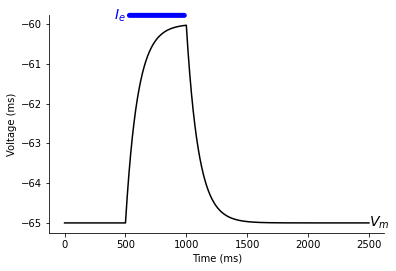

In [21]:
#@title Voltage over time with injected current{ run: "auto", vertical-output: true, display-mode: "form" }

import numpy as np
import matplotlib.pyplot as plt

num_iter = 5000
dt = 0.5 
I_e = 0.05
start = 500
end = 1000
I_i1 = start/dt
I_i2 = end/dt
V_t = V_rest
_v = []
for i in range(num_iter):
    _v.append(V_t)
    I_leak = (V_t - V_rest)/R_m
    _i_e = I_e  if I_i1 < i < I_i2 else 0
    dV = (-I_leak + _i_e) * dt/C_m
    V_t = V_t + dV

plt.plot(np.arange(0,num_iter*dt,dt),_v, c='k')
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (ms)")
y = plt.ylim()[1]

plt.annotate("$I_e$",xy=(end,y),xytext=(start,y), 
             ha='right', va='center', fontsize=14, c='b',
             arrowprops=dict(arrowstyle='-', ec='b', linewidth=5))
plt.annotate("$V_m$",xy=(num_iter*dt,_v[-1]), 
             ha='left', va='center', fontsize=14)
ax = plt.gca()
for spine in [ax.spines['top'], ax.spines['right']]:
    spine.set_visible(False)
plt.show()

* The current voltage value V_t is appended to the _v list.
* The leak current I_leak is calculated
* The effective injected current _i_e is determined based on whether the current iteration falls within the specified injection time range (I_i1 < i < I_i2).
* The change in voltage dV is calculated based on the leak current and the effective injected current, multiplied by the time step dt and divided by the membrane capacitance (C_m).
* The voltage value V_t is updated by adding dV.